<a href="https://colab.research.google.com/github/tuanymariiah/kcHouse/blob/main/Kc_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import dateutil.parser
from matplotlib import pyplot as plt
from matplotlib import gridspec
import plotly.express as px

# Carrega Dados

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Projetos Pessoais/comunidade ds/dataset/kc_house_data.csv')

# Perguntas do CEO
1. Quantas casas estão disponíveis para a compra 
2. Quantos atributos as casas possui
3. Quais são os atributos das casas?
4. Qual a casa mais cara? (Casa com maior valor de venda)
5. Qual a casa com o maior número de quartos?
6. Qual a soma total de quartos do conjunto de dados?
7. Quantas casas possuem 2 banheiros? 
8. Qual o preço médio de todas as casas no conjunto de dados?
9. Qual o preço médio de casas com 2 banheiros?
10. Qual o preço mínimo entre as casas com 3 quartos?
11. Quantas casas possuem mais de 300 m2 na sala de estar?
12. Quantas casas tem mais de 2 andares?
13. Quantas casa tem vista para o mar?
14. Das casas com vista para o mar, quantas tem 3 quartos?
15. Das casas com mais de 300m2 de sala de estar, quantas tem mais de 2 banheiros?
16. Quantos imóveis tem 2 andares?
17. Quantos imóveis estão em situação regular
18. Quantos imóveis estão em situação a *bad* e possuem *Vista para o mar*
19. Quantos imóveis estão com a situacao a *good* e são *new_house*?
20. Qual o valor do imóvel mais caro do tipo *studio*?
21. Quantos imóveis *new_house* foram reformados no ano de 2014?
22. Qual o número de imóveis por ano de construção?
23. Qual o menor número de quartos por ano de contruçao de imoveis?
24. Qual o preço de compra mais alto por cada número de quarto?
25. Qual a soma de todos os preços de compra por número de quartos?
26. Qual a soma de todos os preços de compra por número de quartos e banheiros?
27. Qua o tamanho médio das salas dos imóveis por ano de construção?
28. Qual o tamanho mediano das salas dos imóveis por ano de construção
28. Qual o desvio-padrao do tamanho das salas dos imoveis por ano de construcao
30. Como é o crescimento médio de preços de compras dos imóveis, por ano, dia e pela semana do ano
31.
32.
33.
34.
35.
36



# Respondendo as Perguntas do CEO

## 1. Quantas casas estão disponíveis para a compra
primeiro temos que verificar se existem casas duplicadas para poder sabermos a quantidade de casas disponíveis para a compra, para isso temos duas formas.

* É saber a quantidade de elementos exclusivos 
* Excluir as colunas duplicadas 

In [ ]:
#primeira forma
print('1) Quantidade de casas disponíveis para compra:',len(data['id'].unique()))
print('2) Quantidade de casas disponíveis para compra:',len(data.drop_duplicates('id')))

1) Quantidade de casas disponíveis para compra: 21436
2) Quantidade de casas disponíveis para compra: 21436


## 2. Quantos atributos as casas possui

In [ ]:
#os atributos id e a coluna date nao sao atributos das casas
print('Quantidade de atributos das casas',len((data.drop(['id', 'date'], axis=1).columns)))

Quantidade de atributos das casas 19


## 3. Quais são os atributos das casas?

In [ ]:
data.drop(['id', 'date'], axis=1).columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 4. Qual a casa mais cara? (Casa com maior valor de venda)

In [ ]:
print(f'O valor da casa mais cara: ',data['price'].max())

print('Casa mais cara: ', data[['id', 'price']].sort_values('price', ascending=False).reset_index(drop =True).loc[0, 'id'])

O valor da casa mais cara:  7700000.0
Casa mais cara:  6762700020


## 5. Qual a casa com o maior número de quartos?

In [ ]:
print(f'Maior número de quartos: ',data['bedrooms'].max())
print('Casa com maior número de quartos: ',data[['id', 'bedrooms']].sort_values('bedrooms', ascending=False).reset_index(drop=True).loc[0,'id'])

Maior número de quartos:  33
Casa com maior número de quartos:  2402100895


## 6. Qual a soma total de quartos do conjunto de dados?

In [ ]:
print('Soma todal de quartos do conjunto de dados',data['bedrooms'].sum())

Soma todal de quartos do conjunto de dados 72854


## 7. Quantas casas possuem 2 banheiros?

In [ ]:
print('Quantas casas possuem 2 banheiros: ',len(data[data['bathrooms']==2]))

Quantas casas possuem 2 banheiros:  1930


## 8. Qual o preço médio de todas as casas no conjunto de dados?

In [ ]:
print('preço médio de todas as casas ',np.round(data['price'].mean(), 2))

preço médio de todas as casas  540088.14


## 9. Qual o preço médio de casas com 2 banheiros?


In [ ]:
#estratégia
#1. filtrar casas com 2 banheiros 
#2. usar o mean para saber o preço médio das casas
print('Preço médio de casas com 2 banheiros: ',np.round(data[data['bathrooms']==2][[ 'price']].mean(),2))

Preço médio de casas com 2 banheiros:  price    457889.72
dtype: float64


## 10. Qual o preço mínimo entre as casas com 3 quartos?




In [ ]:
print('preço mínimo entre as casas com 3 quartos: ',np.round(data[data['bedrooms']==3][[ 'price']].min(),2))

preço mínimo entre as casas com 3 quartos:  price    82000.0
dtype: float64


##11. Quantas casas possuem mais de 300 m2 na sala de estar?
primeiro temos que fazer a conversao de sq ft para m2, para depois achar a quantidade de casas que possuem mais de 300m2 na sala de estar

In [ ]:
data['m2'] = data['sqft_living']*0.093

In [ ]:
print('Quantidade de casas que possuem mais de 300 mtros2 na sala de estar',len(data[data['m2']>300]))

Quantidade de casas que possuem mais de 300 mtros2 na sala de estar 2258


## 12. Quantas casas tem mais de 2 andares?





In [ ]:
print('Quantidade de casas que tem mais de 2 andares',len(data[data['floors']>2]))

Quantidade de casas que tem mais de 2 andares 782


## 13. Quantas casa tem vista para o mar?

In [ ]:
print('Quantidade de casas que tem vista para o mar: ',len(data[data['waterfront']==1]))

Quantidade de casas que tem vista para o mar:  163


## 14. Das casas com vista para o mar, quantas tem 3 quartos?

In [ ]:
print('Quantidade de casas com vista para o mar, tem mais de 3 quartos',len(data.loc[(data['waterfront']==1) & (data['bedrooms']==3), 'id']))

Quantidade de casas com vista para o mar, tem mais de 3 quartos 64


## 15.  Das casas com mais de 300m2 de sala de estar, quantas tem mais de 2 banheiros?

In [ ]:
print('Quantidade de casas que tem mais de 300m2, tem mais de 2 banheiros' ,len(data.loc[(data['m2']>300) & (data['bathrooms']==3), 'id']))

Quantidade de casas que tem mais de 300m2, tem mais de 2 banheiros 185


## Criando novas colunas
### 1. Criando uma nova coluna chamada "house_age"
* Se o valor da coluna *date* for maior que 2014-01-01 => 'new_house'
* Se o valor da coluna *date* for menor que 2014-01-01=> 'new_house'

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
dataNorO = pd.to_datetime('2014-01-01', format='%Y-%m-%d')
data['house_age'] = data['date'].apply(lambda x:'new_house' if x > pd.to_datetime('2014-01-01', format='%Y-%m-%d') else old_house)

## 2. Crie uma nova coluna chamada 'dormitory_type'
* se o valor da coluna 'bedrooms' for igual a 1 => 'studio'
* se o valor da coluna 'bedrooms' for igual a 2 => 'apartament'
* se o valor da coluna 'bedrooms' for igual a 3 => 'house'

In [ ]:
def dormitory_type(registro):
  if registro['bedrooms'] == 1:
    return 'studio'
  elif registro['bedrooms']== 2:
    return 'apartament'
  elif registro['bedrooms'] > 2:
    return 'house'

data['dormitory_type'] = data.apply(dormitory_type, axis=1)

## 3. Crie uma nova coluna chamada: 'condition_type'
* Se o valor da coluna 'condition' for menor ou igual à 2 => bad
* Se o valor da coluna 'condition' for igual à 3 ou 4 => regular
* Se o valor da coluna 'condition' for igual à 5 => good

In [ ]:
def condition_type(registro):
  if registro['condition'] <= 2:
    return 'bad'
  elif registro['condition']== 3 or registro['condition']== 4:
    return 'regular'
  elif registro['condition'] == 5:
    return 'good'

data['condition_type'] = data.apply(condition_type, axis=1)

## 4. Modifique o tipo a coluna 'condition' para string
## 5. Deletar as colunas 'sqft_living15' e 'sqft_lot15'
## 6. Modificar o tipo da coluna 'yr_build' para date
## 7. Modificar o tipo da coluna 'yr_renovated' para date

In [ ]:
#4.
data['condition'] = data['condition'].astype(str)

#5.
data.drop(['sqft_living15','sqft_lot15'], axis=1, inplace=True)

#6.
data['yr_built'] = pd.to_datetime(data['yr_built'], format='%Y')#.dt.year

#7.
data['yr_renovated'] = data['yr_renovated'].apply(lambda x: pd.to_datetime('1970-01-01', format='%Y-%m-%d') if x==0 else pd.to_datetime(x, format='%Y') )

##16. Qual a data mais antiga de construção mais antiga de um imóvel?



In [ ]:
datAntiga = data.loc[data['yr_renovated'] > pd.to_datetime('1900-01-01', format='%Y-%m-%d'), 'yr_renovated'].min()
print('A data mais antiga de construção de um imóvel é: ', datAntiga)

A data mais antiga de construção de um imóvel é:  1934-01-01 00:00:00


## 17. Quantos imóveis estão em situação regular


In [ ]:
sit_reg = len(data[data['condition_type']=='regular'])
print('Quantidade de imóveis em situação regular', sit_reg)

Quantidade de imóveis em situação regular 19710


##18. Quantos imóveis estão em situação a *bad* e possuem *Vista para o mar*


In [ ]:
sit_bad = data.loc[(data['condition_type']=='bad') & (data['waterfront']==1), 'id'].size
print('Quantidade de imóveis em situação bad e possuem vista para o mar:', sit_bad)

Quantidade de imóveis em situação bad e possuem vista para o mar: 2


##19. Quantos imóveis estão com a situacao a *good* e são *new_house*?


In [ ]:
sit_good = data.loc[(data['condition_type']=='good') & (data['house_age']=='new_house'), 'id'].size
print('Quantidade de imóveis que estao em situacao good e sao new_house',sit_good)

Quantidade de imóveis que estao em situacao good e sao new_house 1701


##20. Qual o valor do imóvel mais caro do tipo *studio*?


In [ ]:
print('Valor do imóvel mais caro',data[data['dormitory_type']=='studio']['price'].max())

Valor do imóvel mais caro 1247000.0


## 21. Quantos imóveis foram reformados em 2015?

In [ ]:
print('Quantidade de imóveis reformados em 2015:',len(data[data['yr_renovated'] == pd.to_datetime('2015-01-01')]))

Quantidade de imóveis reformados em 2015: 16


## 22. Qual o maior numero de quartos que um imóvel do tipo 'house' possui?



In [ ]:
print('A maior quantidade de quartos que um imóvel do tipo house possui é de: ',data[data['dormitory_type']=='house']['bedrooms'].max())

A maior quantidade de quartos que um imóvel do tipo house possui é de:  33


##23. Quantos imóveis *new_house* foram reformados no ano de 2014?

In [ ]:
data.loc[(data['house_age']=='new_house') & (data['yr_renovated']==pd.to_datetime('2014-01-01', format='%Y-%m-%d')), 'id'].size

91

## 22. Qual o número de imóveis por ano de construção?


In [ ]:
data[['id', 'yr_built']].groupby('yr_built').count()

,id
yr_built,
1900-01-01,87
1901-01-01,29
1902-01-01,27
1903-01-01,46
1904-01-01,45
...,...
2011-01-01,130
2012-01-01,170
2013-01-01,201


## 23. Qual o menor número de quartos por ano de contruçao de imoveis?




In [ ]:
data[['bedrooms','yr_built']].groupby('yr_built').min()

,bedrooms
yr_built,
1900-01-01,1
1901-01-01,2
1902-01-01,2
1903-01-01,1
1904-01-01,2
...,...
2011-01-01,1
2012-01-01,2
2013-01-01,2


## 24. Qual o preço de compra mais alto por cada número de quarto?


In [ ]:
data[['price','bedrooms']].groupby('bedrooms').max()

,price
bedrooms,
0,1295650.0
1,1247000.0
2,3278000.0
3,3800000.0
4,4489000.0
5,7062500.0
6,7700000.0
7,3200000.0
8,3300000.0


## 25. Qual a soma de todos os preços de compra por número de quartos?

In [ ]:
data[['price','bedrooms']].groupby('bedrooms').sum()

,price
bedrooms,
0,5.323550e+06
1,6.321093e+07
2,1.107789e+09
3,4.580264e+09
4,4.372957e+09
5,1.259346e+09
6,2.245416e+08
7,3.614502e+07
8,1.436600e+07


## 26. Qual a soma de todos os preços de compra por número de quartos e banheiros?


In [ ]:
data[['price','bedrooms', 'bathrooms']].groupby(['bathrooms', 'bedrooms']).sum()

price
bathrooms bedrooms           
0.00      0         3642600.0
          1          839000.0
0.50      1          255000.0
          2          382000.0
          4          312500.0
...                       ...
6.75      7          800000.0
7.50      9          450000.0
7.75      6         6885000.0
8.00      6         7700000.0
          7         2280000.0

[144 rows x 1 columns]

##27. Qua o tamanho médio das salas dos imóveis por ano de construção?


In [ ]:
data[['sqft_living','yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900-01-01,1732.011494
1901-01-01,1763.620690
1902-01-01,1919.629630
1903-01-01,1507.739130
1904-01-01,1603.177778
...,...
2011-01-01,2313.684615
2012-01-01,2378.741176
2013-01-01,2636.592040


# 28. Qual o tamanho mediano das salas dos imóveis por ano de construção

In [ ]:
data[['sqft_living','yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1900-01-01,1540.0
1901-01-01,1610.0
1902-01-01,1600.0
1903-01-01,1505.0
1904-01-01,1280.0
...,...
2011-01-01,2270.0
2012-01-01,2237.5
2013-01-01,2580.0


##29. Qual o desvio-padrao do tamanho das salas dos imoveis por ano de construcao


In [ ]:
data[['sqft_living','yr_built']].groupby('yr_built').std()

,sqft_living
yr_built,
1900-01-01,732.944373
1901-01-01,668.231804
1902-01-01,878.659300
1903-01-01,469.723438
1904-01-01,1076.870620
...,...
2011-01-01,804.863521
2012-01-01,771.430350
2013-01-01,883.499390


##30. Como é o crescimento médio de preços de compras dos imóveis, por ano, dia e pela semana do ano

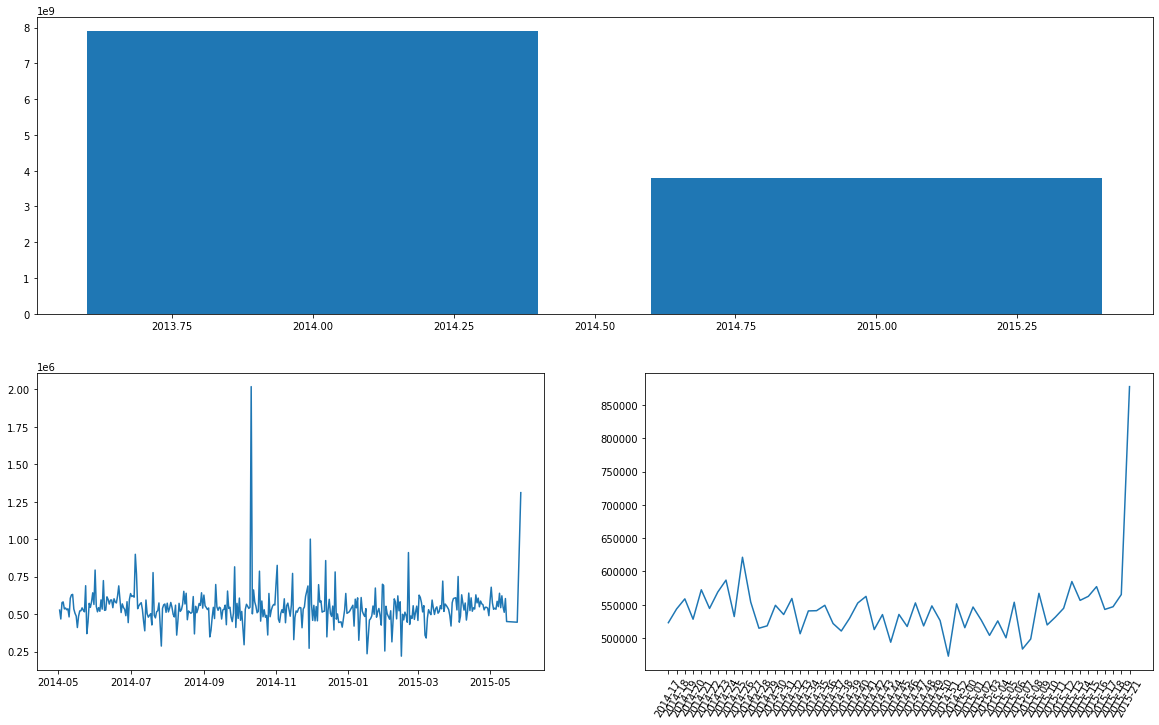

In [ ]:
#crescimento total de precos de compras dos imoveis por ano
#Eixo X: Anos
#Eixo Y: Soma dos precos
data['Year'] = pd.to_datetime(data['date']).dt.year
data['Year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
data['Day'] = pd.to_datetime(data['date'])#.dt.day


fig = plt.figure(figsize=(20,12));
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig);
ax1 = fig.add_subplot(specs[0, :]);
ax2 = fig.add_subplot(specs[1, 0]);
ax3 = fig.add_subplot(specs[1, 1]);




#1. grafico
by_year = data[['price','Year']].groupby('Year').sum().reset_index();
ax1.bar(by_year['Year'], by_year['price']);

#2. grafico
by_day = data[['price','Day']].groupby('Day').mean().reset_index();
ax2.plot(by_day['Day'], by_day['price']);

#3. grafico
by_mes = data[['price','Year_week']].groupby('Year_week').mean().reset_index();
plt.plot(by_mes['Year_week'], by_mes['price']);
plt.xticks(rotation=60);


In [ ]:
houses = data[['id','lat', 'long', 'price']]
fig = px.scatter_mapbox(houses, lat='lat', lon='long', size='price', color_continuous_scale = px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(height=600, margin={"r":0, "t":0,"l":0, "b":0})